## 모수 추정(Parameter estimation)
- MM(Method of Moment)
- MLE (Maximum Likelihood Estimation)
- Bayesian estimation

### MM(Method of Moment)
- 샘플 자료에 대한 샘플 모멘트가 확률 변수의 이론적인 모멘트와 같다고 가정하고 모수를 구하는 방법입니다.
- 1차 모멘트(기댓값, 평균)의 경우,
    - 이론적인 모형 평균 (Mu) = E[X] = 샘플 평균 (x_bar)
- 2차 모멘트(분산)의 경우,
    - 이론적인 모형 분산(sigma^2)= Var[X] = 샘플 분산(s^2)

### MLE 모수 추정의 원리
- MLE는 학률 모형의 모수 추정(parameter estimation)에서 가장 일반적으로 사용되는 방법입니다.

### Likelihood
- pdf를 rv의 값 x의 함수가 아닌 parameter theta의 function으로 보는 것
- probability distribution으로 부터 sample x가 occur 했을 때, 이 sample x가 나오게 할 parameter theta의 value
- probability distribution으로부터 sample x가 occur했을 때, sample x와 variable theta사이의 pdf

### Likelihood and PDF
- pdf f_X(x;theta)
    - known theta
    - theta:constant, x:variable
    - relative prob of x with known theta
- likelihood L(theta) = f_X(x|theta)
    - known x ( already occur)
    - x:constant, theta:variable
    - relatice prob of theta with known x

<IPython.core.display.Javascript object>


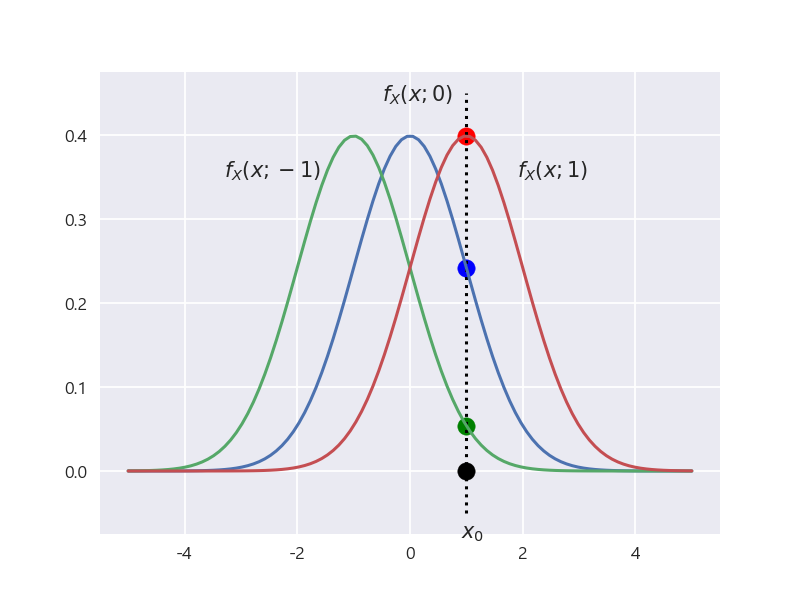

In [6]:
import scipy as sp
x = np.linspace(-5, 5, 100)
plt.plot(x, sp.stats.norm(loc=0).pdf(x))
plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.05, 0.45, linestyle=":")
plt.text(1-0.09, -0.08, "$x_0$")
plt.plot(x, sp.stats.norm(loc=-1).pdf(x))
plt.plot(x, sp.stats.norm(loc=1).pdf(x))
plt.scatter(1, sp.stats.norm(loc=-1).pdf(1), s=100, c='g');
plt.scatter(1, sp.stats.norm(loc=0).pdf(1), s=100, c='b');
plt.scatter(1, sp.stats.norm(loc=1).pdf(1), s=100, c='r');
plt.text(-3.3, 0.35, "$f_X(x;-1)$")
plt.text(-0.5, 0.44, "$f_X(x;0)$")
plt.text(1.9, 0.35, "$f_X(x;1)$");

### MLE(Maximum Likelihood Estimation)
- 주어진 sample x 에 대해서 likelihood를 가장 크게 만들어주는 parameter theta를 찾는 방법입니다.
- optimized_theta_with_MLE = argmax_theta L(theata;{x_i})

- 일반적으로 likelihood에 log 함수를 씌워줘서 계산합니다.
    - 로그함수는 반복시행으로 인한 곱 연산을 덧셈으로 바꿔줍니다.
    - 최대값 위치가 변하지 않습니다.

### MLE 모수 추정의 예
- Bernoulli
- Categorical
- Gaussian Normal
- Multivariate Normal
- 자세한 증명은 생략하겠습니다.

#### Bernoulli distribution parameter estimation
- theta = N_1/N

#### Categorical distribution parameter estimation
- theta_k = N_k/N

#### Gaussian normal distribution parameter estimation
- Mu = 1/N sigma(from i to N) x_i = x_bar
- variance = 1/N sigma(from i to N) (x_i - x_bar)^2 = sample variance

#### Multivariate normal distribution paramter estimation
- Mu = 1/N sigma(i=i to N) x_i = x_bar
- Covariance matrix = 1/N sigma(i to N) (x_i - x_bar)(x_i - x_bar).T

## 베이지안 모수 추정
- 모수의 값에 해당하는 특정한 하나의 숫자를 계산하는 것이 아니라 모수의 값이 가질 수 있는 모든 가능성, 즉 모수의 분포를 계산하는 작업입니다.
    - 모수적 방법
    - 비모수적 방법

- 모수적 방법(parametric method)
    - 모수의 분포를 잘 알려진 확률 분포 모형을 사용하여 나타냅니다. 
    - 이렇게 하면 모수를 나타내는 확률 분포 수식이 다시 모수를 가지게 되고, 이를 hyper-parameter라고 합니다.
    - 모수적 방법은 결국 hyper-parameter의 값을 구하는 작업이 됩니다.

### 베이지안 모수 추정의 기본 원리
- p(theta)를 p(theta | x_1,...,x_N)으로 update하는 작업입니다.
- 즉, 데이터(x_1,...,x_N)이 알려진 상태에서의 theta에 대한 조건부 확률 분포를 구하는 것입니다. 
- 사후 분포를 구하기 위해서는 likelihood 분포가 필요한데, p(x_1,...,x_N | theta)의 띕니다.
- Bayesian parameter estimation equation:
    - p(theta | x_1,...,x_N) = p(x_1,..,x_N | theta)p(theta) / p(x_1,..,x_N) ~ p(x_1,..,x_N | theta)p(theta)

#### 분포의 베이지안 모수 추정
- Bernoulli
- Caterorical
- Gaussian Normal
- 베이지언 모수 추정은 데이터가 constant가 되고 unknown variable인 parameter를 구하는 것입니다.
- p(theta | x_i) 이것을 구해야 합니다.
- p(theta | x_i) = p(x_i | theta) p(theta) 입니다.
- 우리는 각 확률 분포들의 pmf 또는 pdf을 알고있습니다.
- 사전 분포(p(theta))는 이전에 베이지언 분포 섹터에서 배웠던 분포들을 적용해 풉니다.
    - Beta distribution
    - Dirichlet distribution
    - Gamma distrbution
- 사전 분포와 사후 분포가 같은 rv 모형을 띄면, conjugate prior라고 합니다.
- 갱신된 하이퍼 모수를 적용해줍니다. (사전 -> 사후)

#### Bernoulli
- hyper parameter of prior distribution : a=1, b=1 (Beta distribution)
- hyper parameter of posterior distribution(updated) : a' = N_1 + a , b' = N_0 + b

#### Categorical
- hyper parameter of prior distribution : a_k = 1 (Dirichlet distribution)
- hyper parameter of posterior distribution(updated) : a' = N_k + a_k

#### Gaussian normal
- assume variance parameter is known.
- expectation can be (-infinite,infinite) therefore, prior dist is gonna be normal
- prior distribution : 
\begin{eqnarray}
\mu'_0 &=& \dfrac{\sigma^2}{N\sigma_0^2 + \sigma^2}\mu_0 + \dfrac{N\sigma_0^2}{N\sigma_0^2 + \sigma^2} \dfrac{\sum x_i}{N} \\
\dfrac{1}{\sigma_0^{'2}} &=& \dfrac{1}{\sigma_0^{2}} + \dfrac{N}{\sigma^{'2}}
\end{eqnarray}